# Empirical analysis of the 5G coverage 

#### Imports

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Dataset

In [18]:
df_4g = pd.read_csv('datasets/4G-Passive-Measurements.csv')
df_5g = pd.read_csv('datasets/5G-Passive-Measurements.csv')
df_iot = pd.read_csv('datasets/NB-IoT-Passive-Measurements.csv')

In [19]:
print(df_4g.columns)
print(df_5g.columns)
print(df_iot.columns)

Index(['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude',
       'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC',
       'CellIdentity', 'eNodeB.ID', 'Power', 'SINR', 'RSRP', 'RSRQ',
       'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1',
       'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band',
       'campaign'],
      dtype='object')
Index(['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude',
       'Altitude', 'Speed', 'EARFCN', 'Frequency', 'Band', 'PCI', 'SSBIdx',
       'SSS-SINR', 'SSS-RSRP', 'SSS-RSRQ', 'SSS-RePower', 'MNC', 'DM_RS-SINR',
       'DM_RS-RSRP', 'DM_RS-RSRQ', 'DM_RS-RePower', 'PBCH-SINR', 'PBCH-RSRP',
       'PBCH-RSRQ', 'PBCH-RePower', 'PSS-SINR', 'PSS-RSRP', 'PSS-RSRQ',
       'PSS-RePower', 'SS_PBCH-SINR', 'SS_PBCH-RSRP', 'SS_PBCH-RSRQ',
       'SS_PBCH-RePower', 'scenario', 'distance_w', 'campaign'],
      dtype='object')
Index(['Unnamed: 0', 'Date', 'Time', 'UTC', 'Latitude', 'Longitude',
       'Al

In [34]:
df_4g = df_4g[(df_4g['RSRP'] >= -144) & (df_4g['RSRP'] <= -44) &
              (df_4g['RSRQ'] >= -19.5) & (df_4g['RSRQ'] <= -3) &
              (df_4g['SINR'] >= -20) & (df_4g['SINR'] <= 20)]
df_4g = df_4g.fillna(0)

### What can we do in the assignment?

* Could it be an idea to look at the correlation between signal strength and number of PCIs connected to the unit (4g dataset)?
* Alternatively, look into the different kinds of RSRPs in the 5g dataset and do a kind of time analysis?
* Or something completely different? I don't really know what could be possible and is easy enough to do in 1,5 weeks lol

In [37]:
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

print(f'Pearson correlation between RSRP and n_CellIdentities: ', Pearson_correlation(df_4g['RSRP'], df_4g['n_CellIdentities']))
print(f'Pearson correlation between SINR and n_CellIdentities: ', Pearson_correlation(df_4g['SINR'], df_4g['n_CellIdentities']))
print(f'Pearson correlation between RSRQ and n_CellIdentities: ', Pearson_correlation(df_4g['RSRQ'], df_4g['n_CellIdentities']))
print(f'Pearson correlation between RSRP and distance: ', Pearson_correlation(df_4g['RSRP'], df_4g['distance']))
print(f'Pearson correlation between RSRP and speed: ', Pearson_correlation(df_4g['RSRP'], df_4g['Speed']))


Pearson correlation between RSRP and n_CellIdentities:  0.09203430189475155
Pearson correlation between SINR and n_CellIdentities:  0.024756719446048254
Pearson correlation between RSRQ and n_CellIdentities:  -0.028202035349756335
Pearson correlation between RSRP and distance:  -0.3733329950934143
Pearson correlation between RSRP and speed:  -0.02491366003921812


<Axes: >

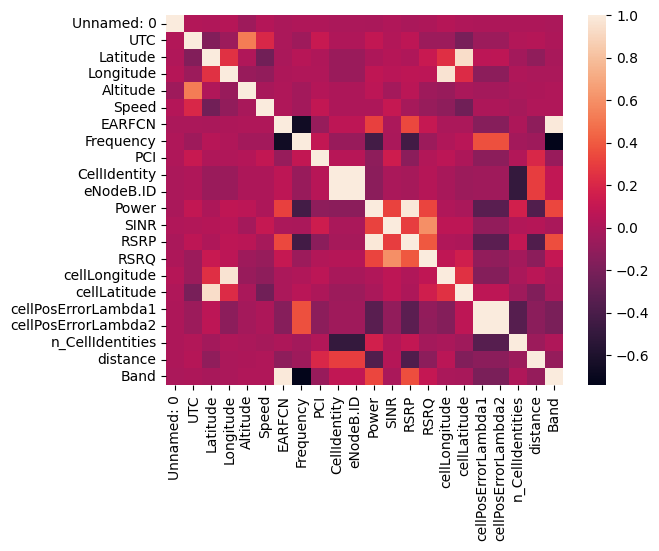

In [43]:
df_4g_numeric_features_only = df_4g.select_dtypes(include=np.number)
corr = df_4g_numeric_features_only.corr(method = 'pearson')
sns.heatmap(corr)